# Explorativna analyza


## Ciel prezentacie:
zrozumitelne vysvetlit a kategorizovat rozne techniky explorativnej analyzy dat podla toho, ake data spracovavame.

### Povieme si o:
* Metrikach na zobrazenie roznych vlastnosti atributov
* Vizualizacii dat a o tom ako ich interpretovat
* Prejdeme si zopar statistickych testov na to aby sme zistili ci su v datach nejake vzory alebo ci existuju vyznamne rozdiely medzi vzorkami

# Struktura prezentacie

## Analyza po jednom (Univariate analysis)
* Spojite atributy
* Kategoricke atributy

## Analyza po paroch atributov (Bivariate analysis)
* Spojite - Spojite
* Kategoricke - Spojite
* Kategoricke - Kategoricke

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn
from sklearn import linear_model as lm

In [5]:
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (8, 6)
from IPython.display import Image, SVG, display

# Analyza po jednom (Univariate analysis)

Zobrazenie vlastnosti jedneho atributu

## Spojite atributy

Chceme zobrazit aky je tvar rozdelenia dat, ci sa zoskupuju okolo nejakeho **centra**, aka je **rozptylenost** hodnot

### Zobrazenie centralnosti:
* mean (priemer)
* median (median, stredna hodnota, prostredna hodnota, centralna hodnota): hodnota, ktora rozdeluje vyssie a nizsie hodnoty
* mode (Modus, modálna hodnota, najpravdepodobnejšia hodnota): najcastejsia hodnota (hodnota s najvacsou pravdepodobnostou vyskytu)

![Comparison mean median mode](https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/Comparison_mean_median_mode.svg/512px-Comparison_mean_median_mode.svg.png)

### Rozptylenost

* range (rozsah): max - min
* quartile (kvartil): hodnota, od ktorej je 25% resp 75% hodnot vacsich 
* percentile (percentil): hodnota, od ktorej je XX% hodnot vacsich
* inter quartile range (medzikvartilove rozpätie): rozdiel medzi 25% a 75% kvartilom, menej nachylne na outlierov ako rozsah
![boxplot](img/outlier_box_plot.gif)

* variance (variancia): priemerna kvadraticka odchylka od priemeru 
$$ E[(X-E[X])^2] $$
* standard deviation (standardna odchylka): druha odmocnina variancie, je v jednotkach meranej premennej
* skewness (vychylenost?): metrika symetrickosti rozdelenia, ci je rozdelenie navazene na jednu stranu 
* kurtosis (zplostenost?): ake mnozstvo dat je vo chvoste rozdelenia
   
(zdroj obrazku: https://taps-graph-review.wikispaces.com/Box+and+Whisker+Plots)   

# Skewness a Kurtosis

## Skewness

Skewness je metrika toho, ako je rozdelenie symetricke. Uplne symetricke rozdelenie ma hodnotu skewness rovnu 0. V podstate to porovnava relativnu velkost dvoch chvostov rozdelenia. 
Rozdelenie naklonene do lava bude mat skewness vacsiu ako 0, naklonene doprava bude mat menej ako 1.

[ 0.01444606 -1.45617352  0.34940282 ... -1.17329304  0.23022736
 -0.69609502]
(10000,)


Text(0.5,1,'Normalne rozdelenie: Skewness -0.00258')

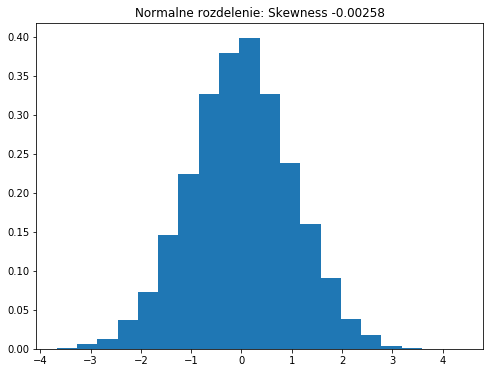

In [6]:
sample_size = 10000

norm = stats.norm(0, 1)
#print(norm)
x = np.linspace(-5, 5, 100)
#print(x)
#print(x.shape)
sample = norm.rvs(sample_size)
print(sample)
print(sample.shape)

#plt.plot(x, norm.pdf(x))
plt.hist(sample, normed=True, bins=20)
plt.title("Normalne rozdelenie: ""Skewness %.5f" % (stats.skew(sample), ))

Text(0.5,1,'Chi-kvadrat(5) rozdelenie: Skewness 1.10080')

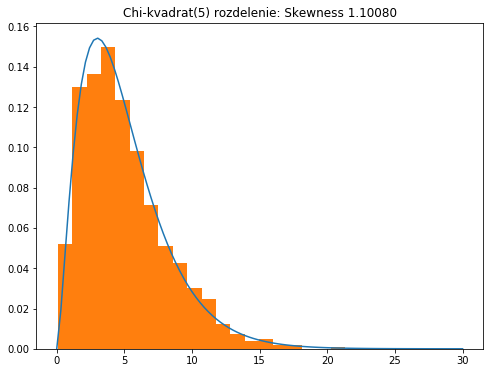

In [7]:
sample_size = 1000

chi2 = stats.chi2(5)
x = np.linspace(0, 30, 100)
sample = chi2.rvs(sample_size)

plt.plot(x, chi2.pdf(x))
plt.hist(sample, normed=True, bins=20)
plt.title("Chi-kvadrat(5) rozdelenie: ""Skewness %.5f" % (stats.skew(sample), ))

Text(0.5,1,'30 - Chi-kvadrat(5) rozdelenie: Skewness -1.07679')

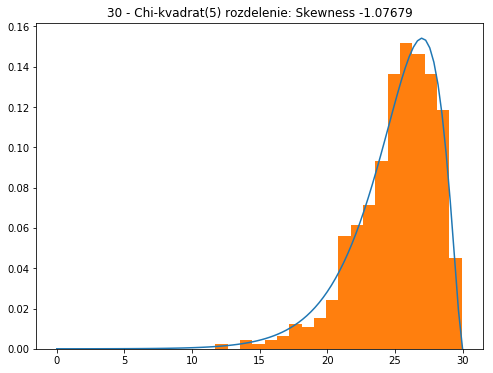

In [8]:
sample_size = 1000

chi2 = stats.chi2(5)
x = np.linspace(0, 30, 100)
sample = 30 - chi2.rvs(sample_size)

plt.plot(x, chi2.pdf(30 - x))
plt.hist(sample, normed=True, bins=20)
plt.title("30 - Chi-kvadrat(5) rozdelenie: ""Skewness %.5f" % (stats.skew(sample), ))

## Kurtosis

Kurtosis hovori aka je kombinovana velkost chvostov. Meria mnozstvo dat sustredene v chvostoch. 
Velmi casto sa porovnava k hodnote kurtosis normalneho rozdelenia, ktora je 3. 
Ak je to viac ako 3, tak viac dat je sustredenych na okrajoch. Ak menej ako 3, tak je menej dat v okrajoch.

Casto sa pouziva aj excess kurtosis, co je rozdiel oproti normalnemu rozdeleniu, cize kurtosis - 3. 

Text(0.5,1,'Normalne rozdelenie: Kurtosis 0.00225')

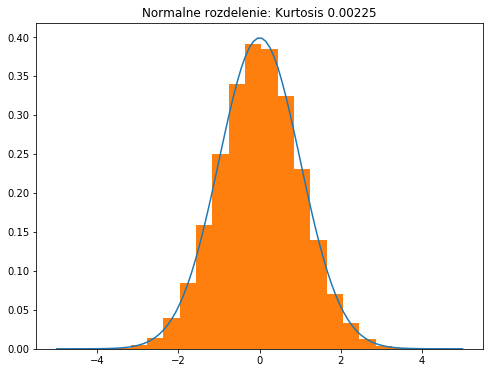

In [9]:
sample_size = 100000

norm = stats.norm(0, 1)
x = np.linspace(-5, 5, 100)
sample = norm.rvs(sample_size)

plt.plot(x, norm.pdf(x))
plt.hist(sample, normed=True, bins=20)
plt.title("Normalne rozdelenie: ""Kurtosis %.5f" % (stats.kurtosis(sample), ))

Ocakavali sme, ze dostaneme hodnotu kurtosis okolo 3. V skutocnosti funkcia stats.kurtosis pocita pri predvolenych nastaveniach excess kurtosis

Text(0.5,1,'Normalne rozdelenie: Kurtosis 2.97134')

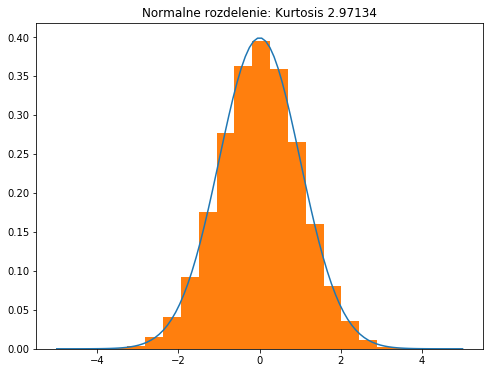

In [10]:
sample_size = 100000

norm = stats.norm(0, 1)
x = np.linspace(-5, 5, 100)
sample = norm.rvs(sample_size)

plt.plot(x, norm.pdf(x))
plt.hist(sample, normed=True, bins=20)
plt.title("Normalne rozdelenie: ""Kurtosis %.5f" % (stats.kurtosis(sample, fisher=False), ))
# musime prestavit parameter fisher na False

A teraz ukazka na nejakych rozdeleniach, kde vieme pekne kontrolovat mnozstvo dat v chvoste. Naprikl lognormal

Text(0.5,1,'LogNormalne rozdelenie (0.5): Kurtosis 3.35390')

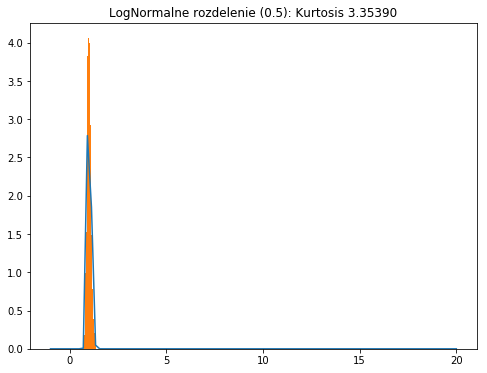

In [11]:
sample_size = 1000

lognorm = stats.lognorm(0.1)
x = np.linspace(-1, 20, 100)
sample = lognorm.rvs(sample_size)

plt.plot(x, lognorm.pdf(x))
plt.hist(sample, normed=True, bins=20)

plt.title("LogNormalne rozdelenie (0.5): ""Kurtosis %.5f" % (stats.kurtosis(sample, fisher=False), ))

Text(0.5,1,'LogNormalne rozdelenie (1.0): Kurtosis 49.73517')

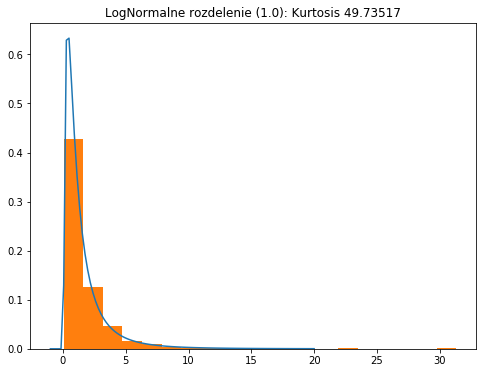

In [12]:
sample_size = 1000

lognorm = stats.lognorm(1)
x = np.linspace(-1, 20, 100)
sample = lognorm.rvs(sample_size)

plt.plot(x, lognorm.pdf(x))
plt.hist(sample, normed=True, bins=20)

plt.title("LogNormalne rozdelenie (1.0): ""Kurtosis %.5f" % (stats.kurtosis(sample, fisher=False), ))

### A teraz viacero rozdeleni v jednom obrazku aby sa to dalo dobre predstavit

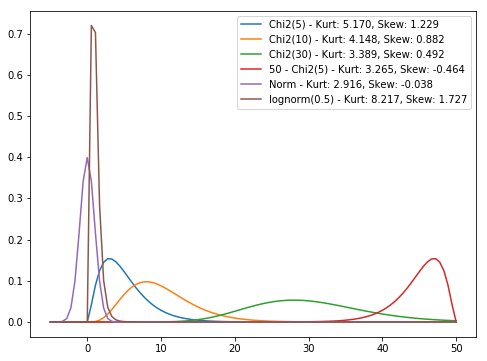

In [13]:
sample_size = 10000
x = np.linspace(-5, 50, 100)

dists = [
    ("Chi2(5)", stats.chi2(5).pdf(x), stats.chi2(5).rvs(sample_size)),
    ("Chi2(10)", stats.chi2(10).pdf(x), stats.chi2(10).rvs(sample_size)),
    ("Chi2(30)", stats.chi2(30).pdf(x), stats.chi2(30).rvs(sample_size)),
    ("50 - Chi2(5)", stats.chi2(5).pdf(50 - x), 50 - stats.chi2(30).rvs(sample_size)),
    ("Norm", stats.norm(0, 1).pdf(x), stats.norm(0, 1).rvs(sample_size)),
    ("lognorm(0.5)", stats.lognorm(0.5).pdf(x), stats.lognorm(0.5).rvs(sample_size))
]

labels = []

for name, dist, sample in dists:
    plt.plot(x, dist)
    labels.append("%s - Kurt: %.3f, Skew: %.3f" % (name, stats.kurtosis(sample, fisher=False), stats.skew(sample)))
    
plt.legend(labels)

## Analyza po jednom - spojite atributy - vizualizacia

Ako ste uz urcite pochopili, tak primarne sposoby vizualizacie su histogram a box plot

In [14]:
sample_size = 100000

norm = stats.norm(0, 1)

x = np.linspace(-5, 5, 100)
sample = np.concatenate([
    stats.norm(0, 1).rvs(sample_size),
    stats.norm(2, 0.5).rvs(sample_size),
    ])

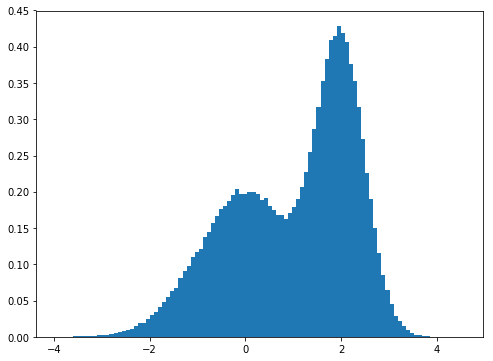

In [15]:
_ = plt.hist(sample, normed=True, bins=100)

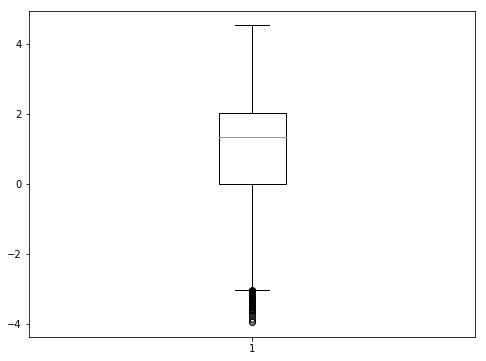

In [16]:
plt.rc("lines", markeredgewidth=0.5)
_ = plt.boxplot(sample)

Osobne mam celkom rad spojenie boxplotu a histogramu do Violinplotu pretoze prehladne ukazuje tvar rozdelenia.

Castejsie sa ale pouziva vykreslenie dvoch obrazkov (aj histogram a aj boxplot). Spolu obsahuju viac informacii ako len jeden violinplot

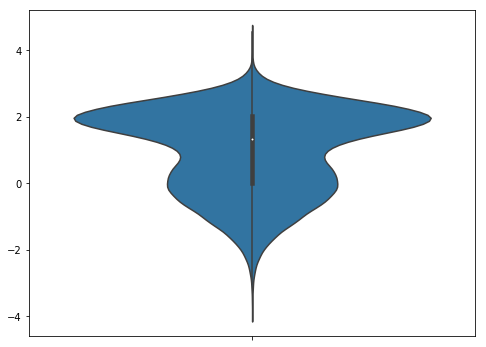

In [17]:
seaborn.violinplot(sample, orient='v')

### QQ-plot

In [18]:
import statsmodels.api as sm

C:\Users\GLaDOS\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [19]:
sample_size = 1000

x = np.linspace(-5, 5, 100)
sample = stats.norm(0, 1).rvs(sample_size)
# sample = stats.norm(10, 5).rvs(sample_size)

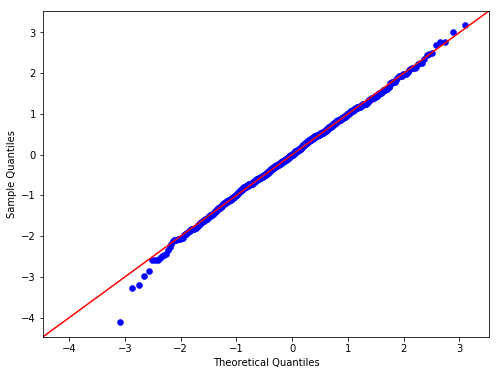

In [20]:
_ = sm.ProbPlot(sample, fit=True).qqplot(line='45')

QQ-plot je vizualna metoda na urcenie, ci dve datove sady pochadzaju z rovnakeho rozdelenia (probability plot porovnava datovu sadu s teoretickym rozdelenim).

Probability plot porovnava voci zvolenemu teoretickemu rozdeleniu. V tomto pripade normalnemu.

Porovnava kvantily rozdeleni.

Osy su v jednotkach porovnavanych datovych sad

Bod na obrazku zobrazuje hodnotu kvantilu v prvom a druhom porovnavanom datasete.

Ak su datasety rovnako velke, tak je to len vykreslenie usporiadanych datasetov pomocou scatterplotu. Ak je jeden mensi, tak sa ten pouzije na urcenie kvartilov a hodnoty z druheho (vacsieho) datasetu sa interpoluju

#### Na ake otazky vie odpovedat?

* Pochadzaju pozorovania z rovnakeho rozdelenia?
* Maju rozdelenia rovnaku skalu (priemer, standardnu odchylku)?
* Je tvar porovnavanych rozdeleni podobny (rovna ciara, bez ohladu na jej posunutie a sklon)? 
* Maju rozdelenia podobne vlastnosti skewness a kurtosis?

Pri zakladnom nastaveni porovnava s normalnym rozdelenim. Co nam velmi nepomoze v pripade, ak nase pozorovania su z uplne ineho rozdelenia. Len nam to povie, ze je to nejake ine rozdelenie.

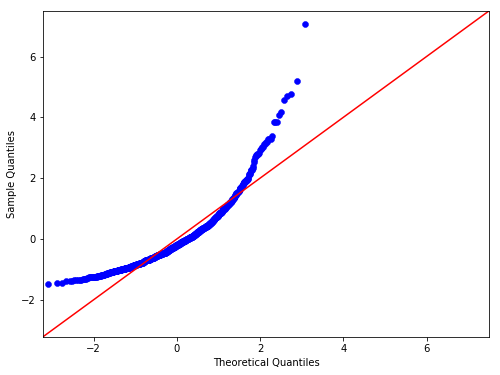

In [21]:
x = np.linspace(-5, 5, 100)
lognorm_sample = stats.lognorm(0.5).rvs(sample_size)
_ = sm.ProbPlot(lognorm_sample, fit=True).qqplot(line='45')

Ocividne je hovadina porovnavat tieto nase pozorovania s uplne inou distribuciou, ale moze sa to hodit, ked mame ine pozorovania

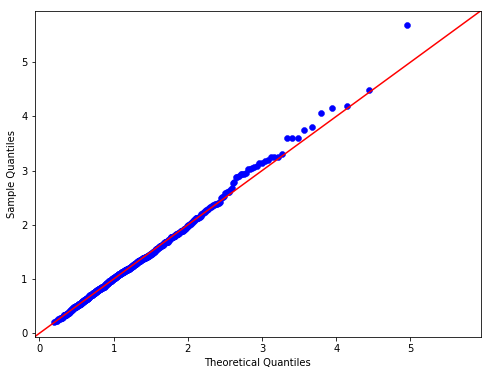

In [22]:
_ = sm.ProbPlot(lognorm_sample, dist=stats.lognorm, fit=True).qqplot(line='45')

Nastastie vieme zmenit teoreticke rozdelenie a mozeme sa porovnan s nim

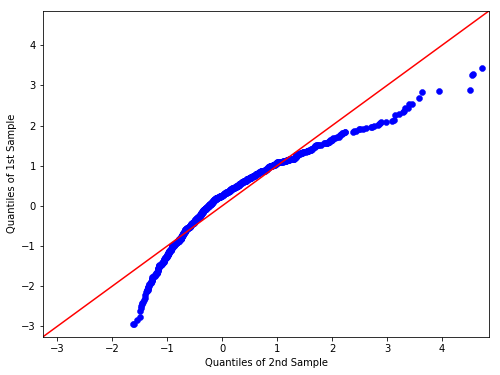

In [23]:
import statsmodels.api as sm
x = stats.norm(8.25, 2.75).rvs(1000)
y = stats.lognorm(0.5).rvs(1000)
pp_x = sm.ProbPlot(x, fit=True)
pp_y = sm.ProbPlot(y, fit=True)
_ = pp_x.qqplot(line='45', other=pp_y)

#### Velmi pekny prispevok o tom ako interpretovat QQ-plot
https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot

![QQ-plot](img/qq-plot.png)

## Analyza po jednom - kategoricke atributy

Tu je najcastejsim sposobom zobrazenia frekvencna tabulka zobrazujuca bud pocty pozorovani per unikatna hodnota atributu alebo pomer voci celkovemu poctu pozorovani. 

Graficka vizualizacia je bar plot

In [24]:
diamonds = pd.read_csv('data/diamonds.csv')
diamonds.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [25]:
diamonds.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [26]:
diamonds.color.value_counts() / len(diamonds)

G    0.209344
E    0.181628
F    0.176900
H    0.153949
D    0.125603
I    0.100519
J    0.052058
Name: color, dtype: float64

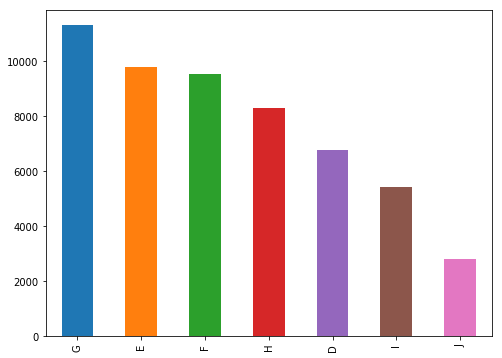

In [27]:
diamonds.color.value_counts().plot(kind='bar')

A samozrejme sa daju pouzit aj dalsie podobne typy na zobrazenie tychto istych dat. Napriklad kolacovy graf, aj ked ten sa cita trochu tazsie ako stlpcovy graf

Ak je atribut ordinalny, tak moze mat zmysel usporiadat hodnoty.

//asi nema zmysel usporiadavat farby, ale tie ich pomenovania ma k tomu nabadaju

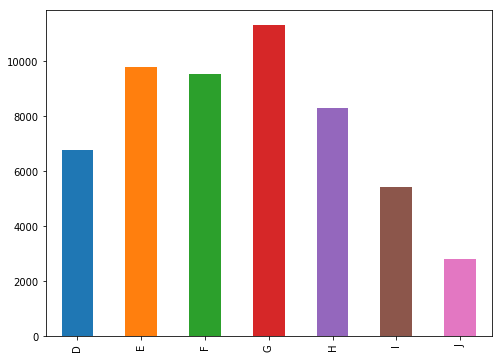

In [28]:
diamonds.color.value_counts()[['D', 'E', 'F', 'G', 'H', 'I', 'J']].plot(kind='bar')

Ked mam atribut, v ktorom su nejake zavislosti (casova naslednost, ine poradie), tak moze mat zmysel zobrazit to pomocou ciaroveho grafu, ktory lepsie zobrazuje zmenu.

Pozor, pouzivat to len v pripade ak su tam zavislosti medzi hodnotami.

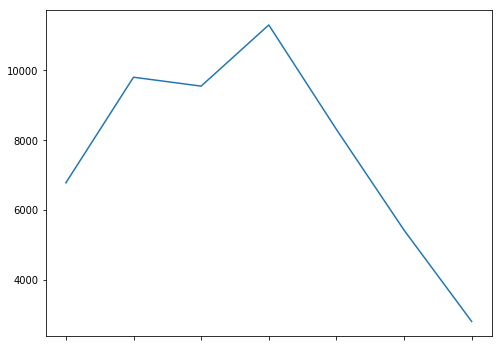

In [29]:
diamonds.color.value_counts()[['D', 'E', 'F', 'G', 'H', 'I', 'J']].plot(kind='line')

Najcastejsie sa tento graf pouziva pri casovych radoch.

Napriklad sa da pouzit na zobrazenie vyvoja nejakej meranej hodnoty v case. V tomto konkretnom pripade je to obsah NO2 vo vzduchu

C:\Users\GLaDOS\Anaconda3\lib\site-packages\pandas\io\parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


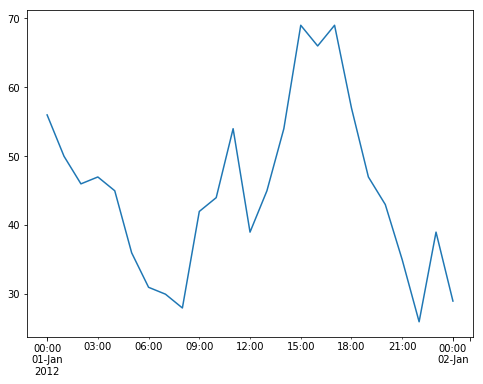

In [30]:
import airbase
no2 = airbase.load_data()

no2["2012-01-01 00:00": "2012-01-02 00:00"].FR04012.plot()

Obcas ma dokonca zmysel prekryvat viacere ciary cez seba, na to aby ste zobrazili viacero atributov / metrik / casovych obdobi ...

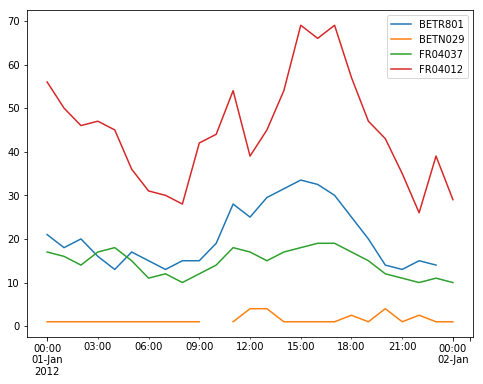

In [31]:
no2["2012-01-01 00:00": "2012-01-02 00:00"].plot()

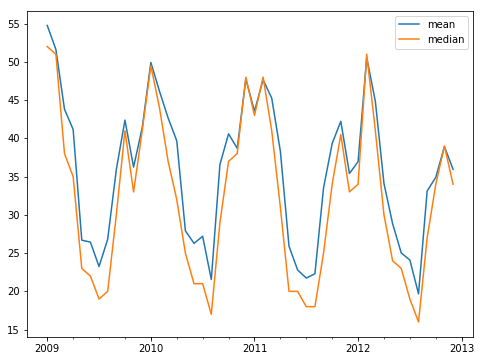

In [32]:
no2.loc['2009':, 'FR04037'].resample('M').agg(['mean', 'median']).plot()

# Analyza po paroch atributov (Bivariate analysis)

Analyza vztahov dvoch atributov. 

Kedze mame spojite a kategoricke atributy, tak mozu vzniknut 3 rozne kombinacie. Pre kazdu z nich existuju metody, ktore mozeme pouzit na opisanie ich vztahov a na ich vizualizaciu.

* Spojite - Spojite
* Kategoricke - Spojite
* Kategoricke - Kategoricke

# Spojity - Spojity

## Scatter plot
Najcastejsi sposob ako vizualizovat vztah dvoch spojitych atributov.
Zobrazuje rozmiestnenie v priestore hodnot. 

Da sa pouzit aj na vizualizovanie skupin pozorovani. Typicky na to aby sme zistili, ci su v datach nejake prirodzene zhluky

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

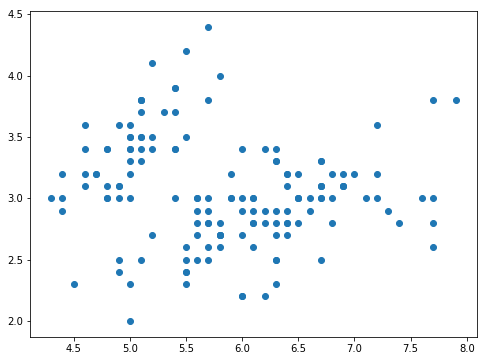

In [37]:
iris = seaborn.load_dataset("iris")

plt.scatter(iris.sepal_length, iris.sepal_width)
iris.head()

Ak ide o oznackovane data, tak ich vieme ofarbit pomocou znacky a pozriet sa na to, ci sa daju na zaklade tychto atributov rozdelit do skupin.

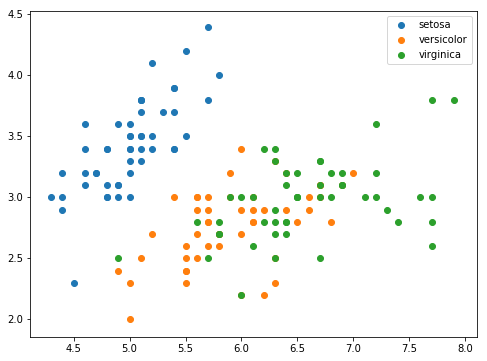

In [34]:
for name, group in iris.groupby("species"):
   plt.scatter(group.sepal_length, group.sepal_width, label=name)

plt.legend()

### Ak chcem vizualizovat vztah vsetkych kombinacii atributov, tak mozem spravit pairplot

Pozor, pri velkom pocte atributov je to dost necitatelne a velmi dlho sa to vytvara

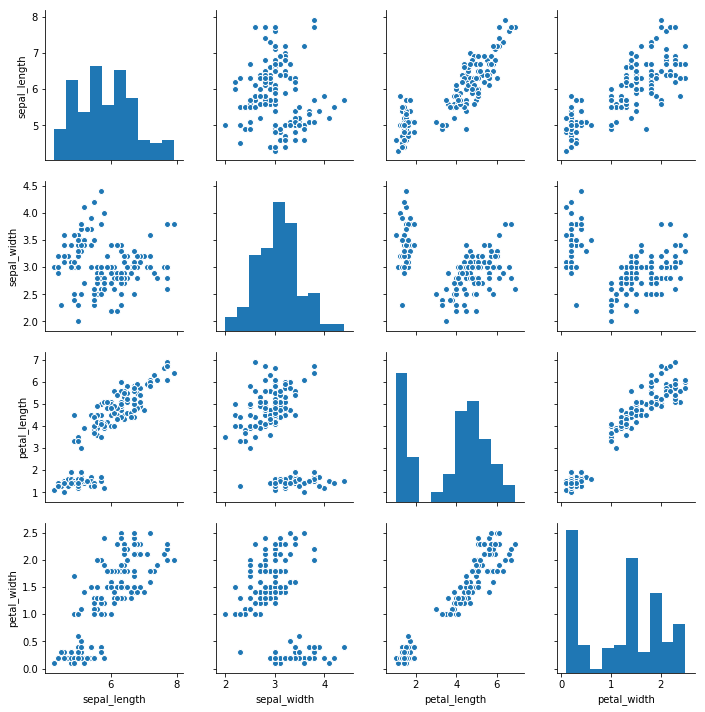

In [35]:
seaborn.pairplot(iris)

### Samozrejme sa da aj pairplot ofarbit triedou

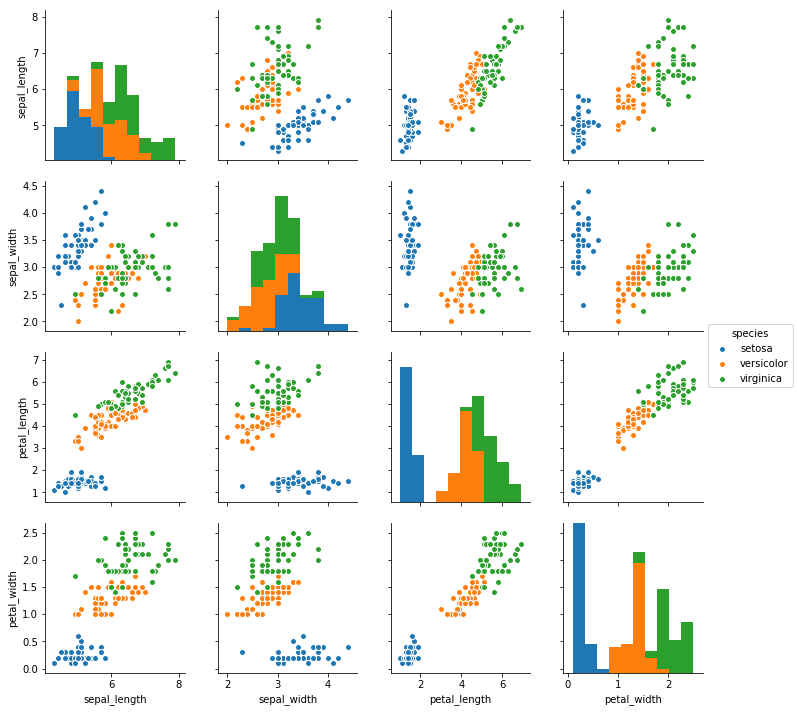

In [36]:
seaborn.pairplot(iris, hue="species")

ak by som chcel manualne vytvarat nejake pravidla na klasifikaciu, tak z tohto obrazku by som uz nejake vedel vyrobit

## Scatterplot sa da pouzit nie len na vizualizovanie zhlukov, ale aj korelacii / zavislosti.

![scatter plot correlation](img/scatter-continuous-contunious.png)

Nedokaze vsak kvantifikovat silu vztahu. Na to potrebujeme nejaku inu metriku - korelaciu.

Zdroj obrazku: https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/#one

# Korelacia

Hodnota v rozsahu [-1, 1], ktora hovori o tom, aky silny linearny vztah je medzi atributmi.

* -1 perfektna negativna korelacia
* 0 ziadna korelacia
* 1 perfektna kladna korelacia

Pearsnov korelacny koeaficient:
$$ corr(X, Y) = \frac{cov(X,Y)}{E[X]E[Y]} = \frac{E[(X-E[X])(Y-E[Y])]}{E[X]E[Y]}$$

In [9]:
car_data = pd.read_csv('data/auto-mpg.data', delim_whitespace=True, 
                       names = ['mpg', 'cylinders', 'displacement','horsepower',
                                'weight', 'acceleration', 'model_year', 'origin', 'name'],
                        na_values='?'
                      )
car_data.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model_year  origin                       name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino

In [10]:
car_data.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year      origin  
count    398.000000  398.000000  398.000000  
mean      15.568090   76.010050    1.572864  
std        2.757689    3.697627    0.802055  
min        8.000000   70.000000    1.000000  
25%       13.825000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.175000   79.000000    2.000000  
max       24.800000   82.000000    3.000000

In [11]:
car_data = car_data.dropna()

Pearson correlation: -0.778


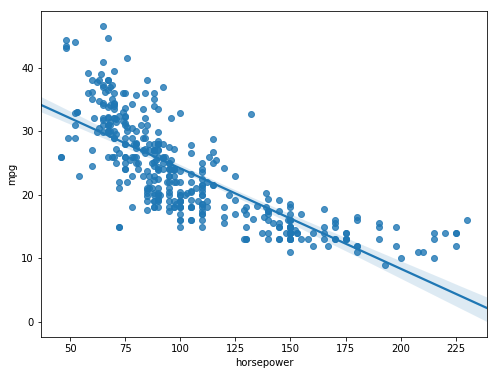

In [12]:
seaborn.regplot(x="horsepower", y="mpg", data=car_data)
print("Pearson correlation: %.3f" % car_data.horsepower.corr(car_data.mpg))

**Pozor** sklon regresnej ciary nehovori o sile korelacie. Len o smere.

In [1]:
regr = lm.LinearRegression()
regr.fit(car_data.horsepower.values.reshape(len(car_data),1), car_data.mpg)

seaborn.regplot(x="horsepower", y="mpg", data=car_data)
print("Pearson correlation: %.3f, Regresion coefficient: %.3f" % (car_data.horsepower.corr(car_data.mpg), regr.coef_[0]))

NameError: name 'lm' is not defined

Sklon regresnej krivky je uplne iny ako velkost korelacie. Len znamienko indikujuce smer je rovnake.

In [2]:
x = np.arange(100)
y = np.ones(100)

synth_data = pd.DataFrame({
    'x': x,
    'y': y
})

regr = lm.LinearRegression()
regr.fit(synth_data.x.values.reshape(100,1), synth_data.y)

seaborn.regplot(x="x", y="y", data=synth_data)
print("Pearson correlation: %.3f, Regresion coefficient: %.3f" % (synth_data.x.corr(synth_data.y), regr.coef_[0]))


NameError: name 'np' is not defined

Toto je extremny pripad, kde korelaciu nevieme spocitat, kedze jedna hodnota je len konstanta (nulova variancia), pricom je to pekna rovna ciara so sklonom 0.

In [ ]:
x = np.arange(100)
y = x * (-3.14) + 3

synth_data = pd.DataFrame({
    'x': x,
    'y': y
})
    
regr = lm.LinearRegression()
regr.fit(synth_data.x.values.reshape(100,1), synth_data.y)

seaborn.regplot(x="x", y="y", data=synth_data)
print("Pearson correlation: %.3f, Regresion coefficient: %.3f" % (synth_data.x.corr(synth_data.y), regr.coef_[0]))

Tu je perfektne linearny vztah, kde je jasne vidiet, ze ten sklon je uplne iny.

In [ ]:
x = np.arange(100)
y = x + stats.norm(0,1).rvs(100)

synth_data = pd.DataFrame({
    'x': x,
    'y': y
})

regr = lm.LinearRegression()
regr.fit(synth_data.x.values.reshape(100,1), synth_data.y)

seaborn.regplot(x="x", y="y", data=synth_data)
print("Pearson correlation: %.3f, Regresion coefficient: %.3f" % (synth_data.x.corr(synth_data.y), regr.coef_[0]))

Aj ked pridame trochu sumu, tak je to velmi podobne

In [ ]:
x = np.arange(100)
y = x + stats.norm(0,30).rvs(100)

synth_data = pd.DataFrame({
    'x': x,
    'y': y
})

regr = lm.LinearRegression()
regr.fit(synth_data.x.values.reshape(100,1), synth_data.y)

seaborn.regplot(x="x", y="y", data=synth_data)
print("Pearson correlation: %.3f, Regresion coefficient: %.3f" % (synth_data.x.corr(synth_data.y), regr.coef_[0]))

Ked ale pridame toho sumu trochu viac, tak sa nam ta korelacia zacne poriadne kazit a znova vidime, ze to s tym smerom nesuvisi.

## Spat k datasetu o autach

### Ak by sme sa chceli pozriet na korelaciu medzi vsetkymi dvojicami atributov, tak sa da pouzit takato korelacna matica

In [13]:
car_data.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
model_year    0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration  model_year    origin  
mpg               0.423329    0.580541  0.565209  
cylinders        -0.504683   -0.345647 -0.568932  
displacement     -0.543800   -0.369855 -0.614535  
horsepower       -0.689196   -0.416361 -0.455171  
weight           -0.416839   -0.309120 -0.585005  
acceleration      1.000000    0.290316  0.212746  
model_year        0.290316    1.000000  0.181528  
origin            0.212746    0.181528  1.000000

### A da sa aj vykreslit pomocou teplotnej mapy, aby sa nam lepsie citala

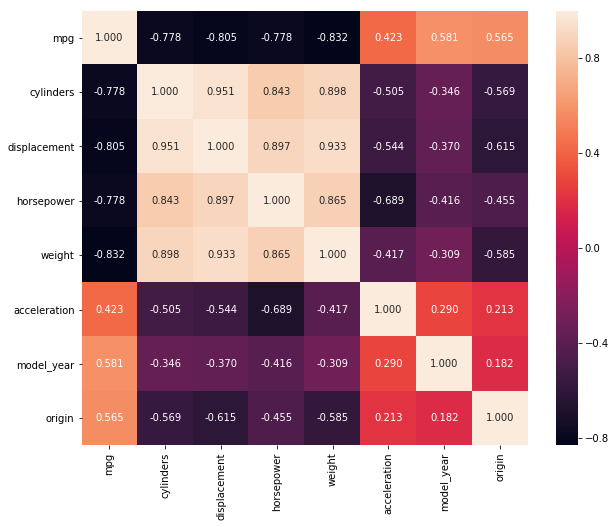

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
seaborn.heatmap(car_data.corr(), ax=ax, annot=True, fmt=".3f")

# Kategoricky - Kategoricky

* Two-way table
* Heatmap
* Stacked bar plot
* Chi-kvadrat testy

In [15]:
titanic = pd.read_csv('data/titanic/train.csv')
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [16]:
# Frekvencna tabulka
titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [17]:
survived_class = pd.crosstab(index=titanic["Survived"], 
                           columns=titanic["Pclass"])
survived_class.index= ["died","survived"]
survived_class

Pclass      1   2    3
died       80  97  372
survived  136  87  119

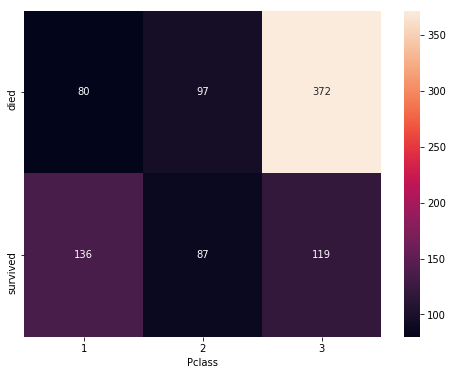

In [18]:
seaborn.heatmap(survived_class, annot=True, fmt="d")

### Ak by sme chceli zobrazit percentualny podiel, tak sa da normalizovat po riadkoch, stlpcoch, alebo vsetkych datach

Pclass           1         2         3
died      0.145719  0.176685  0.677596
survived  0.397661  0.254386  0.347953

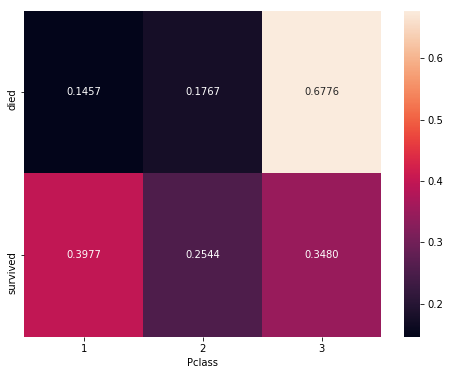

In [19]:
survived_class_perc = pd.crosstab(index=titanic["Survived"], 
                           columns=titanic["Pclass"],
                            normalize='index') #'columns', 'all'
survived_class_perc.index= ["died","survived"]

seaborn.heatmap(survived_class_perc, annot=True, fmt=".4f")
survived_class_perc

### Daju sa tiez spravit aj tabulky s vyssimi dimenziami. Tam sa ale uz velmi rychlo straca prehladnost

In [20]:
pd.crosstab(index=titanic["Survived"], 
            columns=[titanic["Pclass"], titanic["Sex"]],
            margins=True)


Pclass        1           2           3       All
Sex      female male female male female male     
Survived                                         
0             3   77      6   91     72  300  549
1            91   45     70   17     72   47  342
All          94  122     76  108    144  347  891

In [21]:
pd.crosstab(index=titanic["Survived"], 
            columns=[titanic["Pclass"], titanic["Sex"], titanic["Embarked"]],
            margins=True)

Pclass        1                         2                         3          \
Sex      female        male        female        male        female           
Embarked      C  Q   S    C  Q   S      C  Q   S    C  Q   S      C   Q   S   
Survived                                                                      
0             1  0   2   25  1  51      0  0   6    8  1  82      8   9  55   
1            42  1  46   17  0  28      7  2  61    2  0  15     15  24  33   
All          43  1  48   42  1  79      7  2  67   10  1  97     23  33  88   

Pclass                  All  
Sex      male                
Embarked    C   Q    S       
Survived                     
0          33  36  231  549  
1          10   3   34  340  
All        43  39  265  889

# Stacked bar chart

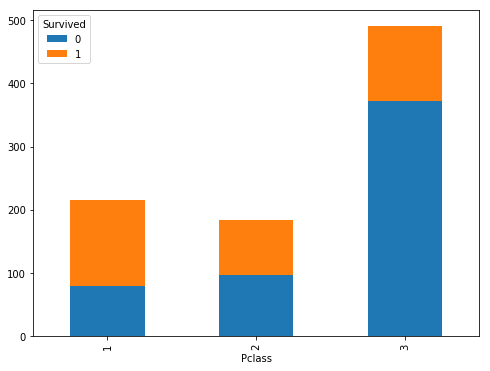

In [22]:
pd.crosstab(index=titanic["Pclass"], columns=titanic["Survived"]).plot.bar(stacked=True)

# Spojity - Kategoricky

Tu sa najcastejsie pouziva rozdelovanie podla kategorickej hodnoty a zobrazovanie rozdeleni podmnozin numerickych hodnot napriklad pomocou histogramov alebo box-plotov.

Cize viacnasobne pouzitie vizualizacii, ktore sa pouzivaju na zobrazenie spojitych atributov

In [23]:
no2.plot(kind='box')

NameError: name 'no2' is not defined

In [ ]:
seaborn.violinplot(no2)